In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder
from scipy import stats
from scipy.stats import skew, skewtest, norm
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Read Kilometer + convert  Negotiable to NAN then calculate mean

In [2]:

# Read the CSV file
uncleaned_df = pd.read_csv("UsedCarsSA_Unclean_EN.csv")

In [3]:
uncleaned_df.head()

Link      Make     Type  Year  \
0  https://syarah.com/%D9%83%D8%B1%D8%A7%D9%8A%D8...  Chrysler     C300  2018   
1  https://syarah.com/%D9%86%D9%8A%D8%B3%D8%A7%D9...    Nissan   Patrol  2016   
2  https://syarah.com/online/%D9%86%D9%8A%D8%B3%D...    Nissan    Sunny  2019   
3  https://syarah.com/online/%D9%87%D9%88%D9%86%D...   Hyundai  Elantra  2019   
4  https://syarah.com/online/%D9%87%D9%88%D9%86%D...   Hyundai  Elantra  2019   

  Origin   Color    Options  Engine_Size Fuel_Type  Gear_Type Condition  \
0  Saudi   Black       Full          5.7       Gas  Automatic      Used   
1  Saudi   White       Full          4.8       Gas  Automatic      Used   
2  Saudi  Silver   Standard          1.5       Gas  Automatic      Used   
3  Saudi    Grey   Standard          1.6       Gas  Automatic      Used   
4  Saudi  Silver  Semi Full          2.0       Gas  Automatic      Used   

   Mileage  Region       Price  Negotiable  
0   103000  Riyadh      114000       False  
1     5448  Riyadh  Negotiable        True  
2    72418  Riyadh       27500       False  
3   114154  Riyadh       43000       False  
4    41912  Riyadh       59500       False

In [4]:

# Select only the required columns from the filtered DataFrame
uncleaned_selected = uncleaned_df[['Make', 'Type', 'Mileage', 'Gear_Type', 'Year', 'Price']]

In [5]:
# Convert Mileage from miles to kilometers
uncleaned_selected['Mileage'] = uncleaned_selected['Mileage'] * 1.60934

C:\Users\HP\AppData\Local\Temp\ipykernel_22812\1416821295.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uncleaned_selected['Mileage'] = uncleaned_selected['Mileage'] * 1.60934


In [6]:
uncleaned_selected.head()

Make     Type       Mileage  Gear_Type  Year       Price
0  Chrysler     C300  165762.02000  Automatic  2018      114000
1    Nissan   Patrol    8767.68432  Automatic  2016  Negotiable
2    Nissan    Sunny  116545.18412  Automatic  2019       27500
3   Hyundai  Elantra  183712.59836  Automatic  2019       43000
4   Hyundai  Elantra   67450.65808  Automatic  2019       59500

In [7]:
x=(uncleaned_selected['Price'] == 'Negotiable').sum()
print(x)

2596


In [8]:
print(uncleaned_selected['Price'].isnull().sum())

0


In [9]:
print(uncleaned_selected.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8248 entries, 0 to 8247
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Make       8248 non-null   object 
 1   Type       8248 non-null   object 
 2   Mileage    8248 non-null   float64
 3   Gear_Type  8174 non-null   object 
 4   Year       8248 non-null   int64  
 5   Price      8248 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 386.8+ KB
None


In [10]:
# Convert 'Negotiable' values to NaN
uncleaned_selected['Price'] = uncleaned_selected['Price'].replace('Negotiable', np.nan)

# Convert 'Price' column to float
uncleaned_selected['Price'] = uncleaned_selected['Price'].astype(float)


print("Standard Deviation before imputation:", uncleaned_selected['Price'].std())


df_mean = uncleaned_selected.copy()
df_mode = uncleaned_selected.copy()
df_median = uncleaned_selected.copy()
df_knn = uncleaned_selected.copy()

# Fill NaN values with mean
mean_price = df_mean['Price'].mean()
df_mean['Price'] = df_mean['Price'].fillna(mean_price)
print("Standard Deviation after mean imputation:", df_mean['Price'].std())

# Fill NaN values with mode
mode_price = df_mode['Price'].mode()[0]
df_mode['Price'] = df_mode['Price'].fillna(mode_price)
print("Standard Deviation after mode imputation:", df_mode['Price'].std())

# Fill NaN values with median
median_price = df_median['Price'].median()
df_median['Price'] = df_median['Price'].fillna(median_price)
print("Standard Deviation after median imputation:", df_median['Price'].std())

# Fill NaN values with KNN imputer
imputer = KNNImputer(n_neighbors=5)
df_knn['Price'] = imputer.fit_transform(df_knn[['Price']])
print("Standard Deviation after KNN imputation:", df_knn['Price'].std())


C:\Users\HP\AppData\Local\Temp\ipykernel_22812\1007923529.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uncleaned_selected['Price'] = uncleaned_selected['Price'].replace('Negotiable', np.nan)
C:\Users\HP\AppData\Local\Temp\ipykernel_22812\1007923529.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uncleaned_selected['Price'] = uncleaned_selected['Price'].astype(float)


Standard Deviation before imputation: 76073.7366953053
Standard Deviation after mean imputation: 62972.27820136172
Standard Deviation after mode imputation: 64869.96984740406
Standard Deviation after median imputation: 63690.518657285356
Standard Deviation after KNN imputation: 62972.27820136172


In [11]:
# Standard deviations before and after imputation
std_before = 76073.7366953053
std_mean = 62972.27820136172
std_mode = 64869.96984740406
std_median = 63690.518657285356
std_knn = 62972.27820136172

diff_mean = abs(std_before - std_mean)
diff_mode = abs(std_before - std_mode)
diff_median = abs(std_before - std_median)
diff_knn = abs(std_before - std_knn)

# Find the imputation method with the smallest difference
min_diff = min(diff_mean, diff_mode, diff_median, diff_knn)

if min_diff == diff_mean:
    print("Mean imputation has the smallest difference.")
elif min_diff == diff_mode:
    print("Mode imputation has the smallest difference.")
elif min_diff == diff_median:
    print("Median imputation has the smallest difference.")
elif min_diff == diff_knn:
    print("KNN imputation has the smallest difference.")


Mode imputation has the smallest difference.


🚩Since the mode has the smallest difference between the std of price coulmn before, it will be the choosen method for missing data imputation 

In [12]:
print(uncleaned_selected['Price'].isnull().sum())

2596


In [13]:
# Calculate mode
mode_price = uncleaned_selected['Price'].mode()[0]

# Impute mode
uncleaned_selected['Price'] = uncleaned_selected['Price'].fillna(mode_price)

print(uncleaned_selected['Price'].isnull().sum())

0


C:\Users\HP\AppData\Local\Temp\ipykernel_22812\1965960608.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uncleaned_selected['Price'] = uncleaned_selected['Price'].fillna(mode_price)


# Merge the two datasets

⚠️Fisrt check the types of each data set if they are the same or not

In [18]:
# Read the cleaned and uncleaned CSV files
cleaned_df = pd.read_csv("used_car_cleaned.csv")
cleaned_df.head()

car_brand    car_model  car_driven car_transmission  car_model_year  \
0     Hyundai       Tucson     83491.0        Automatic            2018   
1   Chevrolet  Trailblazer    222000.0        Automatic            2009   
2       Great         Wall         0.0        Automatic            2022   
3        Ford       Fusion    178000.0        Automatic            2012   
4  Mitsubishi      Attrage     10500.0        Automatic            2020   

   car_price  
0    64000.0  
1    20000.0  
2   135000.0  
3    23000.0  
4    32000.0

In [20]:
for i in range(len(cleaned_df.columns)):
    cleaned_col_type = cleaned_df.iloc[:, i].dtype
    uncleaned_col_type = uncleaned_selected.iloc[:, i].dtype
    
    if cleaned_col_type == uncleaned_col_type:
        print(f"Column {i + 1} has equal types in both DataFrames.")
    else:
        print(f"Column {i + 1} has different types in the DataFrames:")
        print(f"  - Type in cleaned DataFrame: {cleaned_col_type}")
        print(f"  - Type in uncleaned_selected DataFrame: {uncleaned_col_type}")


Column 1 has equal types in both DataFrames.
Column 2 has equal types in both DataFrames.
Column 3 has equal types in both DataFrames.
Column 4 has equal types in both DataFrames.
Column 5 has equal types in both DataFrames.
Column 6 has equal types in both DataFrames.


In [21]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2287 entries, 0 to 2286
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_brand         2287 non-null   object 
 1   car_model         2287 non-null   object 
 2   car_driven        2287 non-null   float64
 3   car_transmission  2287 non-null   object 
 4   car_model_year    2287 non-null   int64  
 5   car_price         2287 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 107.3+ KB


In [22]:
uncleaned_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8248 entries, 0 to 8247
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Make       8248 non-null   object 
 1   Type       8248 non-null   object 
 2   Mileage    8248 non-null   float64
 3   Gear_Type  8174 non-null   object 
 4   Year       8248 non-null   int64  
 5   Price      8248 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 386.8+ KB


Rename coulmns in uncleaned_selected as cleaned_df

In [23]:
# Rename the columns to match the cleaned dataset
uncleaned_selected.columns = ['car_brand', 'car_model', 'car_driven', 'car_transmission', 'car_model_year', 'car_price']

In [24]:

# Merge the rows of the selected subset with the original uncleaned dataset
merged_rows_df = pd.concat([cleaned_df, uncleaned_selected], axis=0)

# Write the merged dataset to a new CSV file
merged_rows_df.to_csv("merged_used_cars_VF.csv", index=False)
merged_rows_df.head()

car_brand    car_model  car_driven car_transmission  car_model_year  \
0     Hyundai       Tucson     83491.0        Automatic            2018   
1   Chevrolet  Trailblazer    222000.0        Automatic            2009   
2       Great         Wall         0.0        Automatic            2022   
3        Ford       Fusion    178000.0        Automatic            2012   
4  Mitsubishi      Attrage     10500.0        Automatic            2020   

   car_price  
0    64000.0  
1    20000.0  
2   135000.0  
3    23000.0  
4    32000.0

In [25]:
print(len(merged_rows_df))
x=len(uncleaned_selected)
y=len(cleaned_df)
print(x,y)
print(x+y)

10535
8248 2287
10535


# Load merged dataset

In [11]:
df = pd.read_csv("merged_used_cars_VF.csv")
df.head()

car_brand    car_model  car_driven car_transmission  car_model_year  \
0     Hyundai       Tucson     83491.0        Automatic            2018   
1   Chevrolet  Trailblazer    222000.0        Automatic            2009   
2       Great         Wall         0.0        Automatic            2022   
3        Ford       Fusion    178000.0        Automatic            2012   
4  Mitsubishi      Attrage     10500.0        Automatic            2020   

   car_price  
0    64000.0  
1    20000.0  
2   135000.0  
3    23000.0  
4    32000.0

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10535 entries, 0 to 10534
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_brand         10535 non-null  object 
 1   car_model         10535 non-null  object 
 2   car_driven        10535 non-null  float64
 3   car_transmission  10461 non-null  object 
 4   car_model_year    10535 non-null  int64  
 5   car_price         10535 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 494.0+ KB


In [5]:
df.describe()

car_driven  car_model_year     car_price
count  1.053500e+04    10535.000000  1.053500e+04
mean   2.098827e+05     2014.060940  7.266551e+04
std    4.998611e+05        5.520032  4.908805e+05
min    0.000000e+00     1936.000000  0.000000e+00
25%    4.184284e+04     2013.000000  4.000000e+04
50%    1.416219e+05     2015.000000  4.500000e+04
75%    2.735878e+05     2017.000000  7.500000e+04
max    3.218680e+07     2022.000000  5.000000e+07

# Check null values

In [125]:
# Check for null values in each column
null_counts = df.isnull().sum()

print("Null values in each column:")
print(null_counts)


Null values in each column:
car_brand            0
car_model            0
car_driven           0
car_transmission    74
car_model_year       0
car_price            0
dtype: int64


<Axes: >

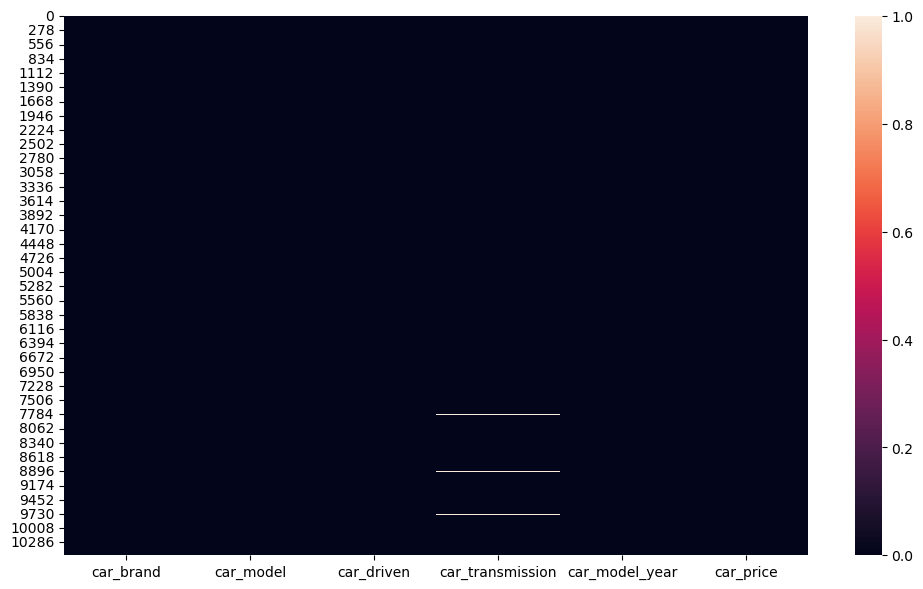

In [126]:
plt.figure(figsize=(12,7))
sns.heatmap(df.isnull())

Since the cas_transmission catogrical data, we will handle it with mode

In [127]:
mode_transmission = uncleaned_selected['car_transmission'].mode()[0]

# Replace null values with mode
df['car_transmission'] = df['car_transmission'].fillna(mode_transmission)

In [128]:
# Check for null values in each column
null_counts = df.isnull().sum()

print("Null values in each column:")
print(null_counts)


Null values in each column:
car_brand           0
car_model           0
car_driven          0
car_transmission    0
car_model_year      0
car_price           0
dtype: int64


# Handling Catogrical Data

In [129]:
print("Coulmn name: car_brand, it is unique values are: ",df['car_brand'].unique())
print()
print("Coulmn name: car_model, it is unique values are: ",df['car_model'].unique())
print()
print("Coulmn name: car_transmission, it is unique values are: ",df['car_transmission'].unique())

Coulmn name: car_brand, it is unique values are:  ['Hyundai' 'Chevrolet' 'Great' 'Ford' 'Mitsubishi' 'Honda' 'Nissan'
 'Toyota' 'MG' 'Dodge' 'BMW' 'Kia' 'Lincoln' 'Cadillac' 'Mazda' 'GMC'
 'Geely' 'Land' 'Citroen' 'Lexus' 'Chery' 'Renault' 'Porsche' 'Audi'
 'Mercedes-Benz' 'Abarth' 'Jeep' 'Volvo' 'Volkswagen' 'Peugeot' 'Chrysler'
 'Suzuki' 'Changan' 'Jaguar' 'Kenbo' 'Maserati' 'Isuzu' 'Mini' 'Mercury'
 'Subaru' 'Foton' 'BAIC' 'Fiat' 'GAC' 'Aston' 'Bentley' 'Infiniti' 'Haval'
 'Mercedes' 'MINI' 'Land Rover' 'Genesis' 'INFINITI' 'Ferrari'
 'Great Wall' 'HAVAL' 'Rolls-Royce' 'Zhengzhou' 'Daihatsu' 'FAW'
 'Aston Martin' 'Pontiac' 'BYD' 'Classic' 'SsangYong' 'Hummer' 'Other'
 'Lifan' 'Tata' 'Victory Auto' 'Škoda' 'JAC' 'Iveco' 'Ashok' 'MAN' 'Buick']

Coulmn name: car_model, it is unique values are:  ['Tucson' 'Trailblazer' 'Wall' 'Fusion' 'Attrage' 'HR-V' 'Accent'
 'Explorer' 'Sentra' 'Yaris' 'Focus' '3' 'Camry' 'Cruze' 'Charger'
 'Cerato' 'Land' 'Expedition' 'Figo' 'Taurus' 'Escape' 'MKS' 

In [130]:
# Frequency encoding for 'car_brand'
car_freq = df.groupby('car_brand').size() / len(df)
df['car_brand_Freq_Enc'] = df.car_brand.map(car_freq)

# Frequency encoding for 'car_model'
carM_freq = df.groupby('car_model').size() / len(df)
df['car_model_Freq_Enc'] = df.car_model.map(carM_freq)

# One-hot encoding for 'car_transmission'
one_hot_encoder_transmission = OneHotEncoder(sparse=False)
transmission_encoded = one_hot_encoder_transmission.fit_transform(df[['car_transmission']])
transmission_categories = one_hot_encoder_transmission.categories_[0]
transmission_columns = [f'car_transmission_{category}' for category in transmission_categories]
df_transmission_encoded = pd.DataFrame(transmission_encoded, columns=transmission_columns)


# Concatenate encoded columns
df = pd.concat([df, df_transmission_encoded], axis=1)
df.head()

/Users/reemalshami/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


car_brand    car_model  car_driven car_transmission  car_model_year  \
0     Hyundai       Tucson     83491.0        Automatic            2018   
1   Chevrolet  Trailblazer    222000.0        Automatic            2009   
2       Great         Wall         0.0        Automatic            2022   
3        Ford       Fusion    178000.0        Automatic            2012   
4  Mitsubishi      Attrage     10500.0        Automatic            2020   

   car_price  car_brand_Freq_Enc  car_model_Freq_Enc  \
0    64000.0            0.105173            0.006455   
1    20000.0            0.071286            0.001614   
2   135000.0            0.000095            0.000095   
3    23000.0            0.182724            0.010252   
4    32000.0            0.014048            0.001044   

   car_transmission_Automatic  car_transmission_CVT  car_transmission_Manual  
0                         1.0                   0.0                      0.0  
1                         1.0                   0.0                      0.0  
2                         1.0                   0.0                      0.0  
3                         1.0                   0.0                      0.0  
4                         1.0                   0.0                      0.0

In [131]:
# Drop original categorical columns
df=df.drop(['car_brand', 'car_model', 'car_transmission'], axis=1)
df.head()

car_driven  car_model_year  car_price  car_brand_Freq_Enc  \
0     83491.0            2018    64000.0            0.105173   
1    222000.0            2009    20000.0            0.071286   
2         0.0            2022   135000.0            0.000095   
3    178000.0            2012    23000.0            0.182724   
4     10500.0            2020    32000.0            0.014048   

   car_model_Freq_Enc  car_transmission_Automatic  car_transmission_CVT  \
0            0.006455                         1.0                   0.0   
1            0.001614                         1.0                   0.0   
2            0.000095                         1.0                   0.0   
3            0.010252                         1.0                   0.0   
4            0.001044                         1.0                   0.0   

   car_transmission_Manual  
0                      0.0  
1                      0.0  
2                      0.0  
3                      0.0  
4                      0.0

# Detecting Outlier

Detecting outlier using Z-score

In [132]:
z_scores = np.abs(stats.zscore(df))
z_scores
#show only those values having z_scores > threshold
threshold = 3

outliers = np.where(z_scores > threshold)

print(outliers)

(array([    8,   148,   153,   154,   184,   205,   329,   330,   334,
         342,   354,   360,   378,   396,   400,   519,   523,   526,
         537,   545,   567,   570,   577,   598,   614,   616,   623,
         774,   898,   903,   904,   907,   912,  1033,  1040,  1050,
        1057,  1066,  1079,  1091,  1123,  1125,  1239,  1244,  1248,
        1250,  1252,  1395,  1396,  1397,  1407,  1445,  1446,  1667,
        1670,  1674,  1679,  1767,  1778,  1802,  1809,  1827,  1828,
        1834,  1836,  1839,  1849,  1874,  1879,  1885,  2033,  2049,
        2067,  2069,  2098,  2101,  2121,  2133,  2158,  2166,  2177,
        2200,  2206,  2207,  2222,  2238,  2244,  2248,  2260,  2329,
        2381,  2402,  2537,  2537,  2578,  2672,  3000,  3020,  3023,
        3099,  3101,  3104,  3155,  3157,  3206,  3208,  3216,  3233,
        3311,  3325,  3431,  3444,  3524,  3544,  3546,  3633,  3770,
        3820,  3824,  3836,  3838,  3861,  3893,  3930,  3995,  4001,
        4025,  4070

In [133]:
# Print the outliers
for i, j in zip(outliers[0], outliers[1]):
    print(f"Outlier found at row ({i}) and column ({j}): {df.iloc[i, j]}")

Outlier found at row (8) and column (6): 1.0
Outlier found at row (148) and column (6): 1.0
Outlier found at row (153) and column (6): 1.0
Outlier found at row (154) and column (6): 1.0
Outlier found at row (184) and column (6): 1.0
Outlier found at row (205) and column (6): 1.0
Outlier found at row (329) and column (6): 1.0
Outlier found at row (330) and column (6): 1.0
Outlier found at row (334) and column (6): 1.0
Outlier found at row (342) and column (6): 1.0
Outlier found at row (354) and column (6): 1.0
Outlier found at row (360) and column (6): 1.0
Outlier found at row (378) and column (6): 1.0
Outlier found at row (396) and column (6): 1.0
Outlier found at row (400) and column (6): 1.0
Outlier found at row (519) and column (6): 1.0
Outlier found at row (523) and column (6): 1.0
Outlier found at row (526) and column (6): 1.0
Outlier found at row (537) and column (6): 1.0
Outlier found at row (545) and column (6): 1.0
Outlier found at row (567) and column (6): 1.0
Outlier found a

In [134]:
print("Number of outliers:", len(outliers[0]))

Number of outliers: 318


{'whiskers': [<matplotlib.lines.Line2D at 0x169579150>,
 'caps': [<matplotlib.lines.Line2D at 0x1695796c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x16952ffa0>],
 'medians': [<matplotlib.lines.Line2D at 0x169579c00>],
 'fliers': [<matplotlib.lines.Line2D at 0x169579ea0>],
 'means': []}

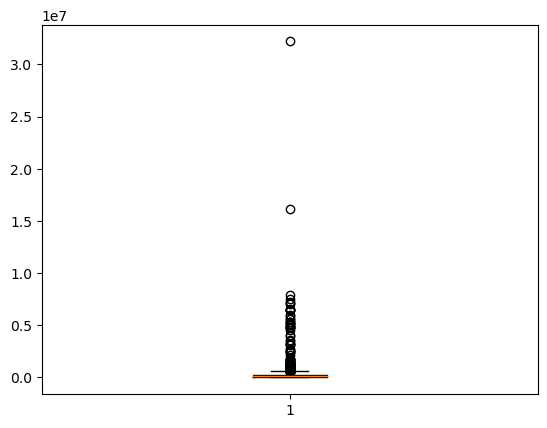

In [135]:
plt.boxplot(df.car_driven)

{'whiskers': [<matplotlib.lines.Line2D at 0x1695f0d90>,
 'caps': [<matplotlib.lines.Line2D at 0x1695f12d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1694e6dd0>],
 'medians': [<matplotlib.lines.Line2D at 0x1695f1810>],
 'fliers': [<matplotlib.lines.Line2D at 0x1695f1ab0>],
 'means': []}

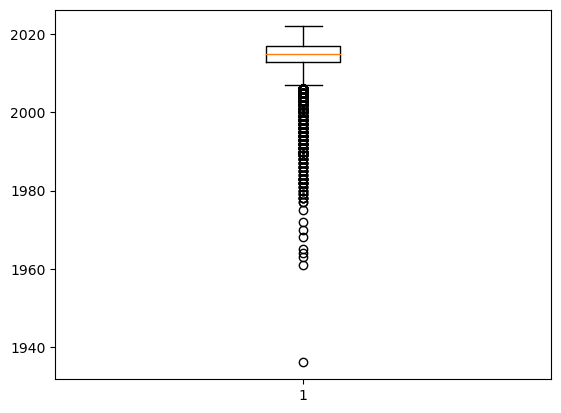

In [136]:
plt.boxplot(df.car_model_year)

{'whiskers': [<matplotlib.lines.Line2D at 0x16963e980>,
 'caps': [<matplotlib.lines.Line2D at 0x16963eec0>,
 'boxes': [<matplotlib.lines.Line2D at 0x16963e6e0>],
 'medians': [<matplotlib.lines.Line2D at 0x16963f400>],
 'fliers': [<matplotlib.lines.Line2D at 0x16963f6a0>],
 'means': []}

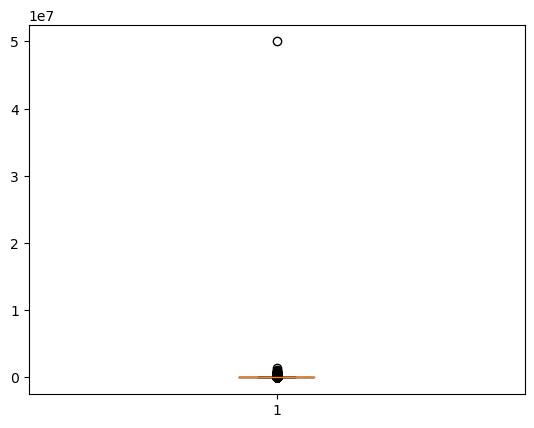

In [137]:
plt.boxplot(df.car_price)

# Remove Outlier

In [138]:
low=0.01#to get the lowest value in prercentage 
high=0.99# to get the highest value in prercentage 
qdf=df.quantile([low,high])

In [139]:
print(np.unique(outliers[1]))

[0 1 2 6]


In [140]:
# Define the DataFrame columns
columns = df.columns

# Print the names of columns based on the given indices
for index in [0, 1, 2, 6]:
    print(f"Column at index {index}: {columns[index]}")

Column at index 0: car_driven
Column at index 1: car_model_year
Column at index 2: car_price
Column at index 6: car_transmission_CVT


will remove the numric data type

In [141]:
df.car_driven=df.car_driven.apply(lambda v:v if qdf.car_driven[low]<v<qdf.car_driven[high] else np.nan)

In [142]:
df.car_model_year=df.car_model_year.apply(lambda v:v if qdf.car_model_year[low]<v<qdf.car_model_year[high] else np.nan)

In [143]:
df.car_price=df.car_price.apply(lambda v:v if qdf.car_price[low]<v<qdf.car_price[high] else np.nan)

In [144]:
df = df.dropna()

Check now the number of outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x1696c9990>,
 'caps': [<matplotlib.lines.Line2D at 0x1696c9ed0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1696c96f0>],
 'medians': [<matplotlib.lines.Line2D at 0x1696ca2f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1696ca590>],
 'means': []}

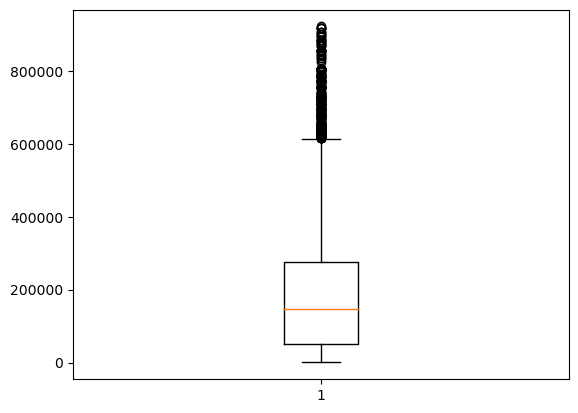

In [145]:
plt.boxplot(df.car_driven)

{'whiskers': [<matplotlib.lines.Line2D at 0x16970bb80>,
 'caps': [<matplotlib.lines.Line2D at 0x16970bcd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x16970b8e0>],
 'medians': [<matplotlib.lines.Line2D at 0x16973c250>],
 'fliers': [<matplotlib.lines.Line2D at 0x16973c4f0>],
 'means': []}

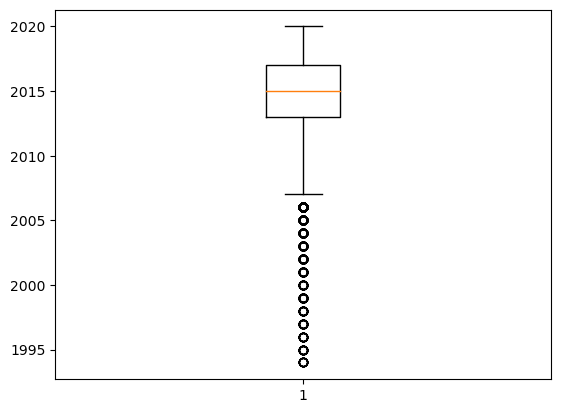

In [146]:
plt.boxplot(df.car_model_year)

{'whiskers': [<matplotlib.lines.Line2D at 0x16977e5f0>,
 'caps': [<matplotlib.lines.Line2D at 0x16977eb30>,
 'boxes': [<matplotlib.lines.Line2D at 0x1695aafe0>],
 'medians': [<matplotlib.lines.Line2D at 0x16977f070>],
 'fliers': [<matplotlib.lines.Line2D at 0x16977f310>],
 'means': []}

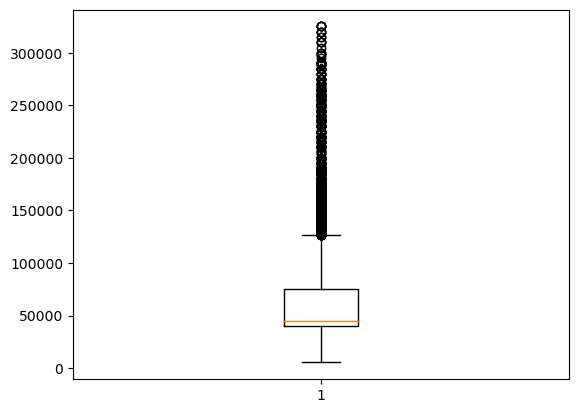

In [147]:
plt.boxplot(df.car_price)

In [120]:
df.head()

car_driven  car_model_year  car_price  car_brand_Freq_Enc  \
0     83491.0          2018.0    64000.0            0.105173   
1    222000.0          2009.0    20000.0            0.071286   
3    178000.0          2012.0    23000.0            0.182724   
4     10500.0          2020.0    32000.0            0.014048   
6     68000.0          2016.0    24000.0            0.105173   

   car_model_Freq_Enc  car_transmission_Automatic  car_transmission_CVT  \
0            0.006455                         1.0                   0.0   
1            0.001614                         1.0                   0.0   
3            0.010252                         1.0                   0.0   
4            0.001044                         1.0                   0.0   
6            0.027812                         1.0                   0.0   

   car_transmission_Manual  
0                      0.0  
1                      0.0  
3                      0.0  
4                      0.0  
6                      0.0

In [151]:
df.to_csv("processed_df_DM.csv", index=False)

# Split the processed data , and normalize the training

In [153]:
processed_df= pd.read_csv("processed_df_DM.csv")

In [154]:
from sklearn.model_selection import train_test_split

# Splitting the data into 80% training and 20% testing
train_data, test_data = train_test_split(processed_df, test_size=0.2, random_state=42)

# Saving training and testing data into separate CSV files
train_data.to_csv('train_data.csv', index=False)
test_data.to_csv('test_data.csv', index=False)


In [156]:
train_df = pd.read_csv("train_data.csv")

In [157]:
train_df.head()

car_driven  car_model_year  car_price  car_brand_Freq_Enc  \
0   410381.70          2012.0    24000.0            0.182724   
1    98169.74          2016.0    72000.0            0.014238   
2   167219.00          2013.0    39000.0            0.182724   
3   157000.00          2013.0    43999.0            0.182724   
4    38624.16          2020.0    70000.0            0.057902   

   car_model_Freq_Enc  car_transmission_Automatic  car_transmission_CVT  \
0            0.003607                         1.0                   0.0   
1            0.003132                         1.0                   0.0   
2            0.036260                         1.0                   0.0   
3            0.025344                         1.0                   0.0   
4            0.001804                         1.0                   0.0   

   car_transmission_Manual  
0                      0.0  
1                      0.0  
2                      0.0  
3                      0.0  
4                      0.0

/var/folders/tn/v5ppv9497nx0jt6r0gb0jdgr0000gn/T/ipykernel_5456/3890845623.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df['car_driven'],fit=norm, color ="r")


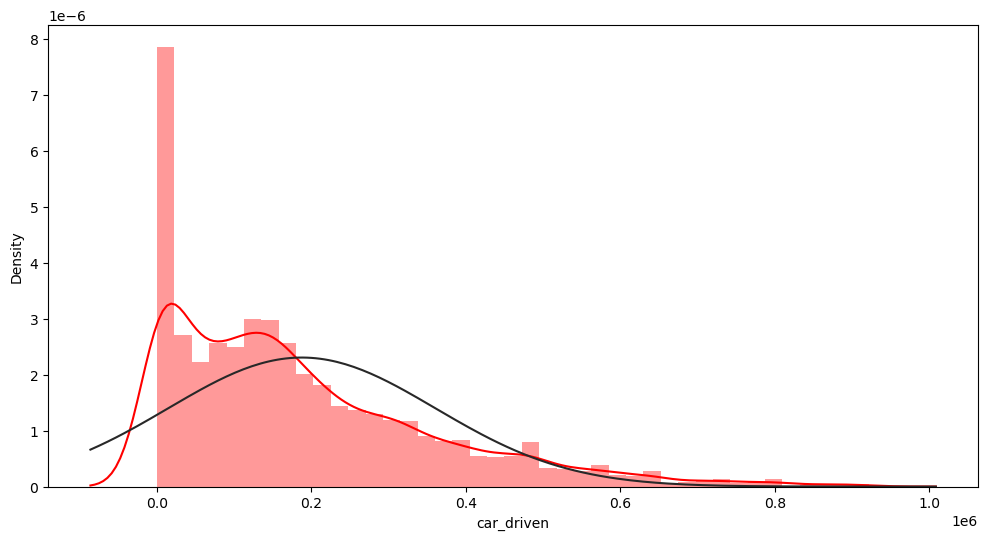

In [167]:
#Plot and check the distribution 
plt.figure(figsize=(12,6))
sns.distplot(train_df['car_driven'],fit=norm, color ="r")
plt.show()

/var/folders/tn/v5ppv9497nx0jt6r0gb0jdgr0000gn/T/ipykernel_5456/1017627236.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df['car_model_year'],fit=norm, color ="r")


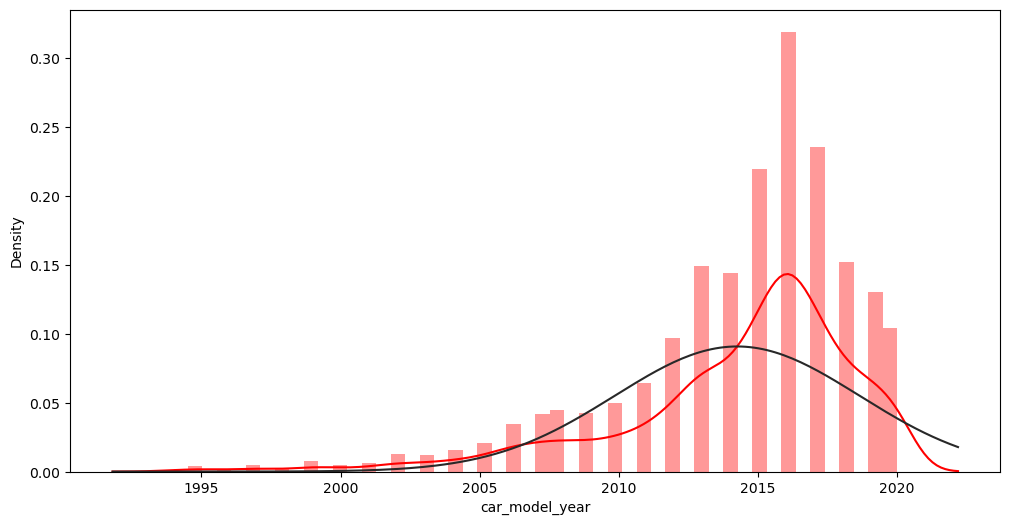

In [168]:
#Plot and check the distribution 
plt.figure(figsize=(12,6))
sns.distplot(train_df['car_model_year'],fit=norm, color ="r")
plt.show()

/var/folders/tn/v5ppv9497nx0jt6r0gb0jdgr0000gn/T/ipykernel_5456/2277167023.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df['car_price'],fit=norm, color ="r")


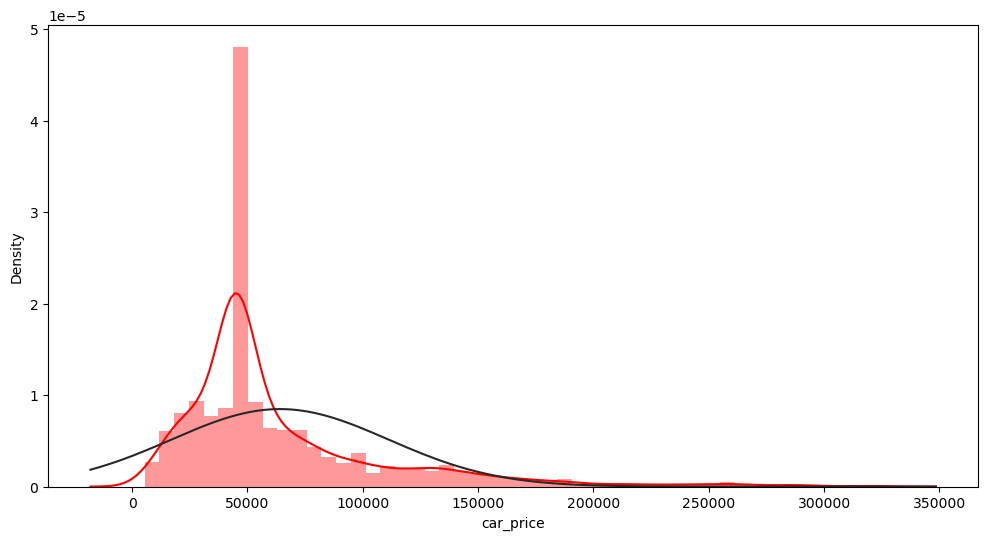

In [169]:
#Plot and check the distribution 
plt.figure(figsize=(12,6))
sns.distplot(train_df['car_price'],fit=norm, color ="r")
plt.show()

In [172]:
# Use MinMaxScaler to apply minmaxscaling
from sklearn.preprocessing import MinMaxScaler

 
numeric_cols = ['car_driven', 'car_model_year', 'car_price']

# Select only numeric columns
numeric_data = train_df[numeric_cols]

# Perform Min-Max scaling on numeric columns
scaler = MinMaxScaler()
scaled_numeric_data = scaler.fit_transform(numeric_data)

# Create DataFrame from scaled data
scaled_numeric_df = pd.DataFrame(scaled_numeric_data, columns=numeric_cols)

# Combine scaled numeric data with categorical columns
scaled_df = pd.concat([scaled_numeric_df, train_df.drop(columns=numeric_cols)], axis=1)



In [173]:
scaled_df.head()

car_driven  car_model_year  car_price  car_brand_Freq_Enc  \
0    0.444928        0.692308   0.058198            0.182724   
1    0.106300        0.846154   0.208385            0.014238   
2    0.181191        0.730769   0.105131            0.182724   
3    0.170108        0.730769   0.120773            0.182724   
4    0.041716        1.000000   0.202128            0.057902   

   car_model_Freq_Enc  car_transmission_Automatic  car_transmission_CVT  \
0            0.003607                         1.0                   0.0   
1            0.003132                         1.0                   0.0   
2            0.036260                         1.0                   0.0   
3            0.025344                         1.0                   0.0   
4            0.001804                         1.0                   0.0   

   car_transmission_Manual  
0                      0.0  
1                      0.0  
2                      0.0  
3                      0.0  
4                      0.0

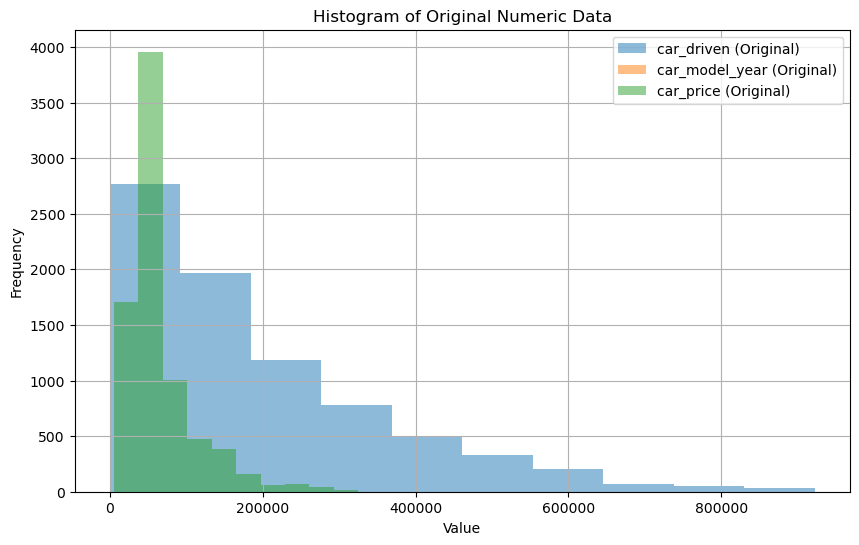

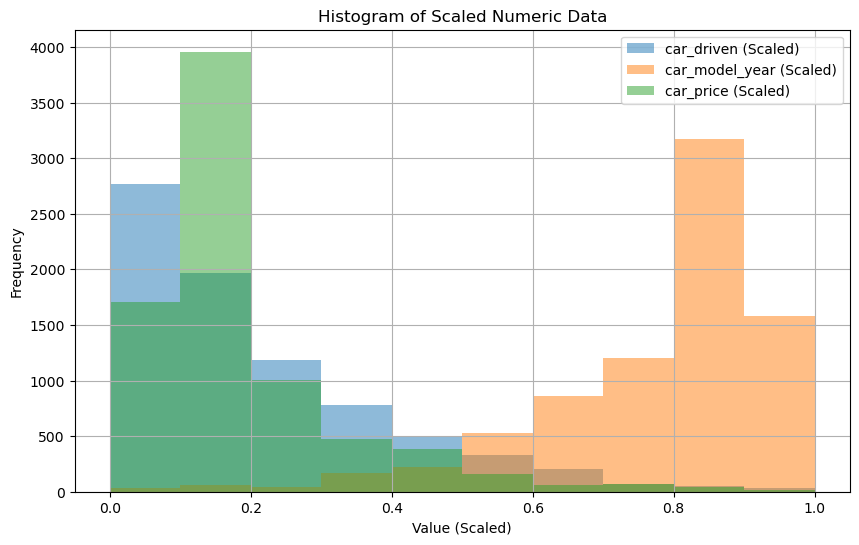

In [176]:
import matplotlib.pyplot as plt

# Assuming scaled_numeric_df contains the scaled numeric data
# and numeric_data contains the original numeric data

# Plot original numeric data
plt.figure(figsize=(10, 6))
for col in numeric_data.columns:
    plt.hist(numeric_data[col], alpha=0.5, label=col + ' (Original)')
plt.title('Histogram of Original Numeric Data')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

# Plot scaled numeric data
plt.figure(figsize=(10, 6))
for col in scaled_numeric_df.columns:
    plt.hist(scaled_numeric_df[col], alpha=0.5, label=col + ' (Scaled)')
plt.title('Histogram of Scaled Numeric Data')
plt.xlabel('Value (Scaled)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()


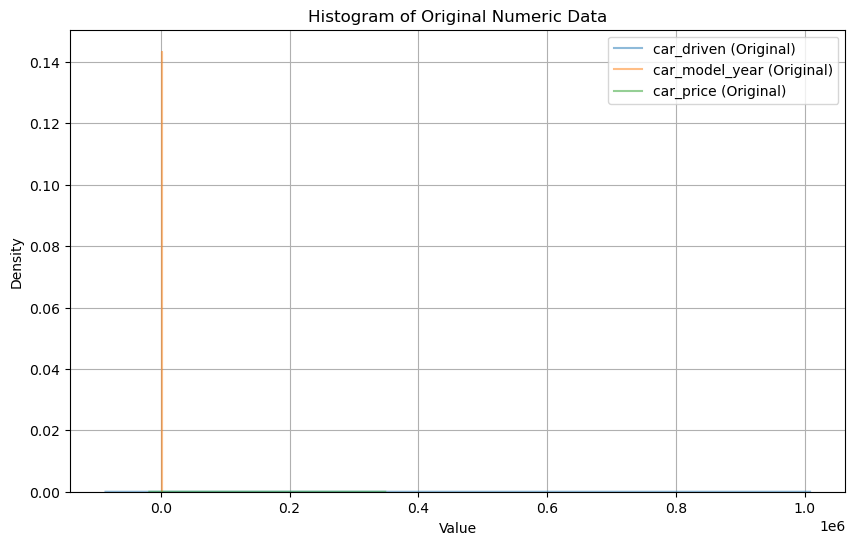

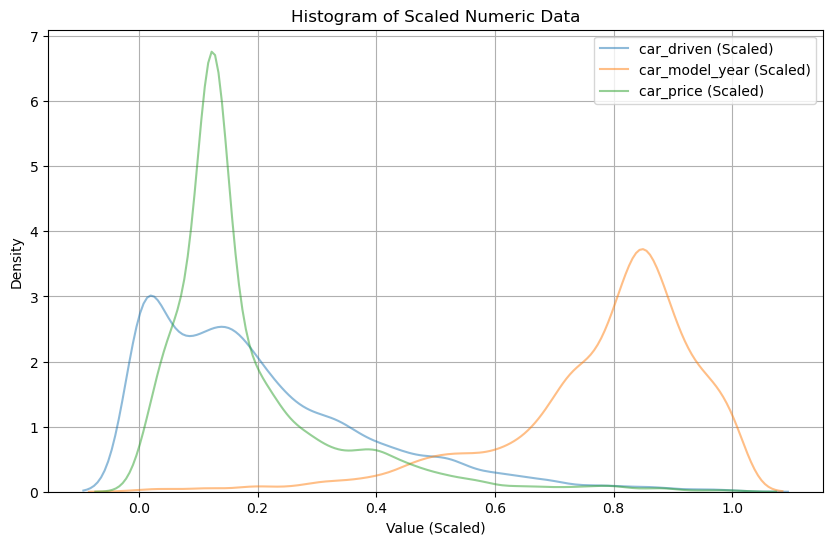

In [180]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot original numeric data
plt.figure(figsize=(10, 6))
for col in numeric_data.columns:
    sns.kdeplot(numeric_data[col], alpha=0.5, label=col + ' (Original)')
plt.title('Histogram of Original Numeric Data')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

# Plot scaled numeric data
plt.figure(figsize=(10, 6))
for col in scaled_numeric_df.columns:
    sns.kdeplot(scaled_numeric_df[col], alpha=0.5, label=col + ' (Scaled)')
plt.title('Histogram of Scaled Numeric Data')
plt.xlabel('Value (Scaled)')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


We can see that the skewness of the distributions are maintained. But, now the three distributions are brought onto the same scale such that they overlap

In [174]:
# Save the DataFrame to CSV
scaled_df.to_csv('scaled_train_data.csv', index=False)

# Data Profiling

In [4]:
pip install ydata-profiling


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.4/139.4 kB 836.5 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.0/215.0 kB 1.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 6.4 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: comm
    Found existing installation: comm 0.1.2
    Uninstalling comm-0.1.2:
      Successfully uninstalled comm-0.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 5.4.1 requires pyqt5<5.16, which is not installed.
spyder 5.4.1 requires pyqtwebengine<5.16, which is not installed.

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


# First Experement

In [9]:
import pandas as pd
from ydata_profiling import ProfileReport

In [6]:
df=pd.read_csv('processed_df_DM.csv')
df.head()

car_driven  car_model_year  car_price  car_brand_Freq_Enc  \
0     83491.0          2018.0    64000.0            0.105173   
1    222000.0          2009.0    20000.0            0.071286   
2    178000.0          2012.0    23000.0            0.182724   
3     10500.0          2020.0    32000.0            0.014048   
4     68000.0          2016.0    24000.0            0.105173   

   car_model_Freq_Enc  car_transmission_Automatic  car_transmission_CVT  \
0            0.006455                         1.0                   0.0   
1            0.001614                         1.0                   0.0   
2            0.010252                         1.0                   0.0   
3            0.001044                         1.0                   0.0   
4            0.027812                         1.0                   0.0   

   car_transmission_Manual  
0                      0.0  
1                      0.0  
2                      0.0  
3                      0.0  
4                      0.0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9844 entries, 0 to 9843
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   car_driven                  9844 non-null   float64
 1   car_model_year              9844 non-null   float64
 2   car_price                   9844 non-null   float64
 3   car_brand_Freq_Enc          9844 non-null   float64
 4   car_model_Freq_Enc          9844 non-null   float64
 5   car_transmission_Automatic  9844 non-null   float64
 6   car_transmission_CVT        9844 non-null   float64
 7   car_transmission_Manual     9844 non-null   float64
dtypes: float64(8)
memory usage: 615.4 KB


In [10]:
profile = ProfileReport(df, title="Pandas Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
#Saving the Profile Report
#profile.to_file("profiling_data..html") or profile.to_file("profiling_data.json")

# Remove row duplication for data profiling second experement

In [14]:
df=pd.read_csv('processed_df_DM.csv')
df.head()

car_driven  car_model_year  car_price  car_brand_Freq_Enc  \
0     83491.0          2018.0    64000.0            0.105173   
1    222000.0          2009.0    20000.0            0.071286   
2    178000.0          2012.0    23000.0            0.182724   
3     10500.0          2020.0    32000.0            0.014048   
4     68000.0          2016.0    24000.0            0.105173   

   car_model_Freq_Enc  car_transmission_Automatic  car_transmission_CVT  \
0            0.006455                         1.0                   0.0   
1            0.001614                         1.0                   0.0   
2            0.010252                         1.0                   0.0   
3            0.001044                         1.0                   0.0   
4            0.027812                         1.0                   0.0   

   car_transmission_Manual  
0                      0.0  
1                      0.0  
2                      0.0  
3                      0.0  
4                      0.0

In [15]:
import pandas as pd

df = pd.read_csv('processed_df_DM.csv')

duplicate_rows = df[df.duplicated()]
num_duplicate_rows = duplicate_rows.shape[0]

df_cleaned = df.drop_duplicates()

print("Number of duplicate rows:", num_duplicate_rows)
print("DataFrame after removing duplicates:")
print(df_cleaned.head())

print("Check after remo")

Number of duplicate rows: 1266
DataFrame after removing duplicates:
   car_driven  car_model_year  car_price  car_brand_Freq_Enc  \
0     83491.0          2018.0    64000.0            0.105173   
1    222000.0          2009.0    20000.0            0.071286   
2    178000.0          2012.0    23000.0            0.182724   
3     10500.0          2020.0    32000.0            0.014048   
4     68000.0          2016.0    24000.0            0.105173   

   car_model_Freq_Enc  car_transmission_Automatic  car_transmission_CVT  \
0            0.006455                         1.0                   0.0   
1            0.001614                         1.0                   0.0   
2            0.010252                         1.0                   0.0   
3            0.001044                         1.0                   0.0   
4            0.027812                         1.0                   0.0   

   car_transmission_Manual  
0                      0.0  
1                      0.0  
2        

In [16]:
import pandas as pd
from ydata_profiling import ProfileReport

In [18]:
profile = ProfileReport(df_cleaned, title="Pandas Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Model bulding:

In [10]:
train = pd.read_csv("scaled_train_data.csv")
train.head()

car_driven  car_model_year  car_price  car_brand_Freq_Enc  \
0    0.444928        0.692308   0.058198            0.182724   
1    0.106300        0.846154   0.208385            0.014238   
2    0.181191        0.730769   0.105131            0.182724   
3    0.170108        0.730769   0.120773            0.182724   
4    0.041716        1.000000   0.202128            0.057902   

   car_model_Freq_Enc  car_transmission_Automatic  car_transmission_CVT  \
0            0.003607                         1.0                   0.0   
1            0.003132                         1.0                   0.0   
2            0.036260                         1.0                   0.0   
3            0.025344                         1.0                   0.0   
4            0.001804                         1.0                   0.0   

   car_transmission_Manual  
0                      0.0  
1                      0.0  
2                      0.0  
3                      0.0  
4                      0.0

🚩 Remove dublicate from training data

In [16]:
train.shape

(7875, 8)

In [17]:
#check dublicate:
print(train[train.duplicated()])
print("-------------------")
print("Total : ",len(train[train.duplicated()]))

      car_driven  car_model_year  car_price  car_brand_Freq_Enc  \
57      0.181191        0.730769   0.105131            0.182724   
181     0.124825        0.807692   0.123905            0.182724   
227     0.016392        0.846154   0.186480            0.182724   
248     0.201561        0.769231   0.055069            0.182724   
284     0.033488        0.846154   0.048808            0.182724   
...          ...             ...        ...                 ...   
7857    0.061346        0.769231   0.170835            0.182724   
7863    0.086636        0.807692   0.167707            0.182724   
7864    0.090714        0.769231   0.229506            0.182724   
7868    0.004620        0.884615   0.405504            0.182724   
7873    0.078283        0.730769   0.209790            0.013099   

      car_model_Freq_Enc  car_transmission_Automatic  car_transmission_CVT  \
57              0.036260                         1.0                   0.0   
181             0.010252               

In [18]:
#drop duplicates :
train = train.drop_duplicates()
print("Total : ",len(train[train.duplicated()]))
train.shape

Total :  0


(6916, 8)

🚩 Scale and remove dubplicate from test data 

In [14]:
test = pd.read_csv("test_data.csv")
test.head()

car_driven  car_model_year  car_price  car_brand_Freq_Enc  \
0   579362.40          2006.0    45000.0            0.224775   
1   178636.74          2016.0    45000.0            0.105173   
2     7000.00          2017.0   142800.0            0.182724   
3     3960.00          2017.0   150150.0            0.182724   
4    10666.00          2015.0    52500.0            0.182724   

   car_model_Freq_Enc  car_transmission_Automatic  car_transmission_CVT  \
0            0.035501                         1.0                   0.0   
1            0.022402                         1.0                   0.0   
2            0.036260                         1.0                   0.0   
3            0.040152                         1.0                   0.0   
4            0.010252                         1.0                   0.0   

   car_transmission_Manual  
0                      0.0  
1                      0.0  
2                      0.0  
3                      0.0  
4                      0.0

In [19]:
# Use MinMaxScaler to apply minmaxscaling
from sklearn.preprocessing import MinMaxScaler

 
numeric_cols = ['car_driven', 'car_model_year', 'car_price']

# Select only numeric columns
numeric_data = test[numeric_cols]

# Perform Min-Max scaling on numeric columns
scaler = MinMaxScaler()
scaled_numeric_data = scaler.fit_transform(numeric_data)

# Create DataFrame from scaled data
scaled_numeric_df = pd.DataFrame(scaled_numeric_data, columns=numeric_cols)

# Combine scaled numeric data with categorical columns
scaled_df = pd.concat([scaled_numeric_df, test.drop(columns=numeric_cols)], axis=1)



In [20]:
#check dublicate:
print(scaled_df[scaled_df.duplicated()])
print("-------------------")
print("Total : ",len(scaled_df[scaled_df.duplicated()]))

      car_driven  car_model_year  car_price  car_brand_Freq_Enc  \
47      0.210619        0.730769   0.090617            0.182724   
121     0.007533        0.884615   0.436566            0.182724   
153     0.011572        0.807692   0.149444            0.182724   
174     0.000568        0.884615   0.888709            0.013099   
220     0.002263        0.846154   0.102703            0.182724   
...          ...             ...        ...                 ...   
1937    0.048261        0.846154   0.157390            0.182724   
1946    0.075060        0.846154   0.271857            0.182724   
1959    0.024726        0.807692   0.125596            0.182724   
1966    0.054045        0.807692   0.147851            0.224775   
1967    0.024187        0.884615   0.300474            0.182724   

      car_model_Freq_Enc  car_transmission_Automatic  car_transmission_CVT  \
47              0.036260                         1.0                   0.0   
121             0.036260               

In [21]:
#drop duplicates :
scaled_df = scaled_df.drop_duplicates()
print("Total : ",len(scaled_df[scaled_df.duplicated()]))
scaled_df.shape

Total :  0


(1815, 8)

In [22]:
# Save the DataFrame to CSV
scaled_df.to_csv('scaled_test_data.csv', index=False)

In [9]:
test_df = pd.read_csv("scaled_test_data.csv")
test_df.head()

car_driven  car_model_year  car_price  car_brand_Freq_Enc  \
0    0.638232        0.461538   0.125596            0.224775   
1    0.196663        0.846154   0.125596            0.105173   
2    0.007533        0.884615   0.436566            0.182724   
3    0.004183        0.884615   0.459936            0.182724   
4    0.011572        0.807692   0.149444            0.182724   

   car_model_Freq_Enc  car_transmission_Automatic  car_transmission_CVT  \
0            0.035501                         1.0                   0.0   
1            0.022402                         1.0                   0.0   
2            0.036260                         1.0                   0.0   
3            0.040152                         1.0                   0.0   
4            0.010252                         1.0                   0.0   

   car_transmission_Manual  
0                      0.0  
1                      0.0  
2                      0.0  
3                      0.0  
4                      0.0

# Split data into x_train, y_train

In [12]:
X_train = train.drop(columns=['car_price'])
y_train = train['car_price']

X_test = test_df.drop(columns=['car_price'])
y_test = test_df['car_price']

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7875, 7)
(7875,)
(1815, 7)
(1815,)


# DT model

In [23]:
# import the regressor 
from sklearn.tree import DecisionTreeRegressor  
  
# create a regressor object 
regressor = DecisionTreeRegressor()  
  
# fit the regressor with X and Y data 
regressor.fit(X_train, y_train) 

DecisionTreeRegressor()

In [24]:
#test model:
y_pred = regressor.predict(X_test)

In [25]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)
print("R-squared:", r_squared)

Mean Absolute Error: 0.06347929749379289
Mean Squared Error: 0.014627352192764904
R-squared: 0.31764482996313914


In [27]:
# Given results
mae = 0.06347929749379289
mse = 0.014627352192764904
r_squared = 0.31764482996313914

# Round the results
rounded_mae = round(mae, 3)
rounded_mse = round(mse, 3)
rounded_r_squared = round(r_squared, 3)

# Print the rounded results
print("Mean Absolute Error (MAE):", rounded_mae)
print("Mean Squared Error (MSE):", rounded_mse)
print("R-squared (R²):", rounded_r_squared)


Mean Absolute Error (MAE): 0.063
Mean Squared Error (MSE): 0.015
R-squared (R²): 0.318


The MAE and MSE indicate that the model's predictions for car prices have significant errors and variance from the actual prices.
The extremely negative R-squared value suggests that the model does not fit the data well and performs worse than a naive model that simply predicts the mean car price.


# RF

In [27]:
from sklearn.ensemble import RandomForestRegressor

# Fitting Random Forest Regression to the dataset
regressor_rf = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True)
 
# Fit the regressor with x and y data
regressor_rf.fit(X_train, y_train)

/Users/reemalshami/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


RandomForestRegressor(n_estimators=10, oob_score=True, random_state=0)

In [28]:
#test model:
y_pred = regressor_rf.predict(X_test)

In [29]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)
print("R-squared:", r_squared)

Mean Absolute Error: 0.05698273349307597
Mean Squared Error: 0.010187854370826777
R-squared: 0.5247441225244578


In [28]:
# Given results
mae = 0.05698273349307597
mse = 0.010187854370826777
r_squared = 0.5247441225244578

# Round the results
rounded_mae = round(mae, 3)
rounded_mse = round(mse, 3)
rounded_r_squared = round(r_squared, 3)

# Print the rounded results
print("Mean Absolute Error (MAE):", rounded_mae)
print("Mean Squared Error (MSE):", rounded_mse)
print("R-squared (R²):", rounded_r_squared)


Mean Absolute Error (MAE): 0.057
Mean Squared Error (MSE): 0.01
R-squared (R²): 0.525


The low MAE and MSE suggest that the model's predictions are relatively close to the actual car prices, with small errors and variance.
The R-squared value of 0.525 indicates that the model explains a moderate amount of the variance in the car prices. While not perfect, it suggests that the model captures some of the patterns in the data and performs better than a naive model that simply predicts the mean car price.

# xgboost

In [2]:
pip install xgboost


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [36]:
import xgboost as xg 

xgb_r = xg.XGBRegressor(objective ='reg:linear', 
                  n_estimators = 10, seed = 123) 
  
# Fitting the model 
xgb_r.fit(X_train, y_train) 
  
# Predict the model 
pred = xgb_r.predict(X_test) 
  

/Users/reemalshami/anaconda3/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [22:35:47] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


In [37]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)
print("R-squared:", r_squared)

Mean Absolute Error: 0.0907110794736475
Mean Squared Error: 0.018169461889670543
R-squared: 0.15240803025602856


In [29]:
# Given results
mae = 0.0907110794736475
mse = 0.018169461889670543
r_squared = 0.15240803025602856

# Round the results
rounded_mae = round(mae, 3)
rounded_mse = round(mse, 3)
rounded_r_squared = round(r_squared, 3)

# Print the rounded results
print("Mean Absolute Error (MAE):", rounded_mae)
print("Mean Squared Error (MSE):", rounded_mse)
print("R-squared (R²):", rounded_r_squared)


Mean Absolute Error (MAE): 0.091
Mean Squared Error (MSE): 0.018
R-squared (R²): 0.152


The MAE and MSE indicate that your model's predictions have some error when compared to the actual values, although the errors are relatively small.
The R-squared value suggests that your model's features are not fully capturing the variability in the target variable, indicating that there may be room for improvement in your model.


# Model Optmization with Grid Search

# DT + Grid

In [47]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters grid
param_grid = {
    'max_depth': [2, 5, 10, 15, 20, 30, None],  
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 5, 10, 15, 20]
}


# Create a decision tree regressor
dt_regressor = DecisionTreeRegressor()

# Create GridSearchCV
grid_search = GridSearchCV(estimator=dt_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 10, 15, 20, 30, None],
                         'min_samples_leaf': [1, 2, 5, 10, 15, 20],
                         'min_samples_split': [2, 5, 10, 15, 20]},
             scoring='neg_mean_squared_error')

In [49]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Get the best estimator from the grid search
best_estimator = grid_search.best_estimator_
best_params = grid_search.best_params_
best_params = grid_search.best_params_

# Make predictions on the test data
y_pred_test = best_estimator.predict(X_test)

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred_test)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred_test)

# Calculate R-squared
r_squared = r2_score(y_test, y_pred_test)

print("Best Parameters:", best_params)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r_squared)


Best Parameters: {'max_depth': 30, 'min_samples_leaf': 10, 'min_samples_split': 5}
Mean Absolute Error (MAE): 0.06224422941257327
Mean Squared Error (MSE): 0.010949202351026314
R-squared (R²): 0.4892278018917161


In [26]:
from sklearn.tree import DecisionTreeRegressor

# Best parameters obtained from grid search
best_params = {'max_depth': 30, 'min_samples_leaf': 10, 'min_samples_split': 15}

# Create a new decision tree regressor with the best parameters
best_regressor = DecisionTreeRegressor(**best_params)

# Fit the model to the training data
best_regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred_test = best_regressor.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
r_squared = r2_score(y_test, y_pred_test)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r_squared)


Mean Absolute Error (MAE): 0.060461534218941744
Mean Squared Error (MSE): 0.01091478522703864
R-squared (R²): 0.4908333352911516


In [30]:
# Given results
mae = 0.060461534218941744
mse = 0.01091478522703864
r_squared = 0.4908333352911516

# Round the results
rounded_mae = round(mae, 3)
rounded_mse = round(mse, 3)
rounded_r_squared = round(r_squared, 3)

# Print the rounded results
print("Mean Absolute Error (MAE):", rounded_mae)
print("Mean Squared Error (MSE):", rounded_mse)
print("R-squared (R²):", rounded_r_squared)


Mean Absolute Error (MAE): 0.06
Mean Squared Error (MSE): 0.011
R-squared (R²): 0.491


# RF +Grid

In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],  
    'max_depth': [None, 10, 20],      
    'min_samples_split': [2, 5, 10],   
    'min_samples_leaf': [1, 2, 4]     
}

# Create a Random Forest regressor
rf_regressor = RandomForestRegressor(random_state=42)

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Create a new Random Forest regressor with the best parameters
best_rf_regressor = RandomForestRegressor(**best_params, random_state=42)

# Fit the model to the training data
best_rf_regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred_test = best_rf_regressor.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
r_squared = r2_score(y_test, y_pred_test)

print("Best Parameters:", best_params)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r_squared)


Best Parameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 300}
Mean Absolute Error (MAE): 0.05554477338637586
Mean Squared Error (MSE): 0.009434965335462503
R-squared (R²): 0.559865839631877


In [21]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.ensemble import RandomForestRegressor

# Fitting Random Forest Regression to the dataset
regressor_rf = RandomForestRegressor(max_depth= None, min_samples_leaf= 2, min_samples_split= 10, n_estimators= 300)
 
# Fit the regressor with x and y data
regressor_rf.fit(X_train, y_train)
y_pred = regressor_rf.predict(X_test)

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)
print("R-squared:", r_squared)

Mean Absolute Error: 0.05547782497315834
Mean Squared Error: 0.009415918589310502
R-squared: 0.560754356264137


In [31]:
# Given results
mae = 0.05547782497315834
mse = 0.009415918589310502
r_squared = 0.560754356264137

# Round the results
rounded_mae = round(mae, 3)
rounded_mse = round(mse, 3)
rounded_r_squared = round(r_squared, 3)

# Print the rounded results
print("Mean Absolute Error (MAE):", rounded_mae)
print("Mean Squared Error (MSE):", rounded_mse)
print("R-squared (R²):", rounded_r_squared)


Mean Absolute Error (MAE): 0.055
Mean Squared Error (MSE): 0.009
R-squared (R²): 0.561


# XB+ Grid

In [19]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],       
    'max_depth': [3, 4, 5],                   
    'min_child_weight': [1, 2, 3]           
    
}

# Create an XGBRegressor model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror')

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Train the grid search on the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Create a new XGBRegressor model with the best parameters
best_xgb_model = xgb.XGBRegressor(objective='reg:squarederror', **best_params)

# Train the model on the data
best_xgb_model.fit(X_train, y_train)

# Make predictions on the data
y_pred = best_xgb_model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print("Best Parameters:", best_params)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r_squared)


Best Parameters: {'max_depth': 4, 'min_child_weight': 3, 'n_estimators': 200}
Mean Absolute Error (MAE): 0.05725891340108327
Mean Squared Error (MSE): 0.009011367925764164
R-squared (R²): 0.5796263457516964


In [32]:
# Given results
mae = 0.05725891340108327
mse = 0.009011367925764164
r_squared = 0.5796263457516964

# Round the results
rounded_mae = round(mae, 3)
rounded_mse = round(mse, 3)
rounded_r_squared = round(r_squared, 3)

# Print the rounded results
print("Mean Absolute Error (MAE):", rounded_mae)
print("Mean Squared Error (MSE):", rounded_mse)
print("R-squared (R²):", rounded_r_squared)


Mean Absolute Error (MAE): 0.057
Mean Squared Error (MSE): 0.009
R-squared (R²): 0.58


# Comparitive analysis

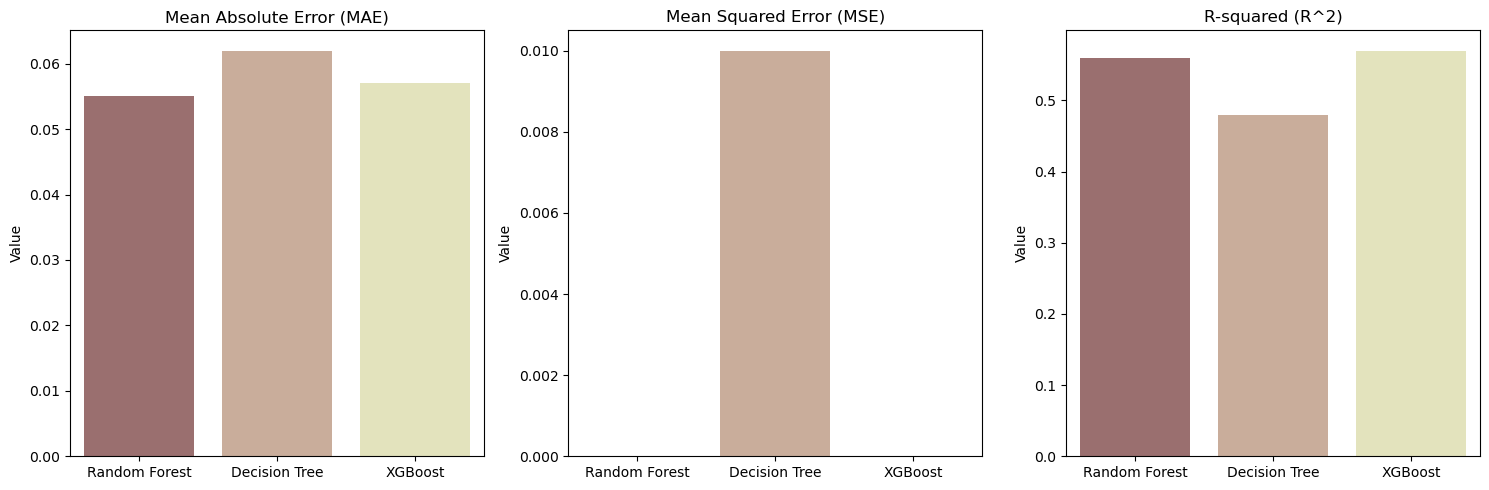

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data (replace these with your actual scores)
rf_mae = 0.055
dt_mae = 0.062
xgb_mae = 0.057

rf_mse = 0.00
dt_mse = 0.01
xgb_mse = 0.00

rf_r2 = 0.56
dt_r2 = 0.48
xgb_r2 = 0.57

# Data preparation
models = ['Random Forest', 'Decision Tree', 'XGBoost']
mae_values = [rf_mae, dt_mae, xgb_mae]
mse_values = [rf_mse, dt_mse, xgb_mse]
r2_values = [rf_r2, dt_r2, xgb_r2]

# Plotting
plt.figure(figsize=(15, 5))

# MAE histogram
plt.subplot(1, 3, 1)
sns.barplot(x=models, y=mae_values, palette='pink')
plt.title('Mean Absolute Error (MAE)')
plt.ylabel('Value')

# MSE histogram
plt.subplot(1, 3, 2)
sns.barplot(x=models, y=mse_values, palette='pink')
plt.title('Mean Squared Error (MSE)')
plt.ylabel('Value')

# R-squared histogram
plt.subplot(1, 3, 3)
sns.barplot(x=models, y=r2_values, palette='pink')
plt.title('R-squared (R^2)')
plt.ylabel('Value')

plt.tight_layout()
plt.show()


# Correlation Measurments

In [2]:
df1= pd.read_csv('scaled_test_data.csv')
df2= pd.read_csv('scaled_train_data.csv')
df3= df1+df2
df3.head()

car_driven  car_model_year  car_price  car_brand_Freq_Enc  \
0    1.083161        1.153846   0.183794            0.407499   
1    0.302963        1.692308   0.333982            0.119411   
2    0.188724        1.615385   0.541697            0.365449   
3    0.174290        1.615385   0.580709            0.365449   
4    0.053288        1.807692   0.351571            0.240626   

   car_model_Freq_Enc  car_transmission_Automatic  car_transmission_CVT  \
0            0.039108                         2.0                   0.0   
1            0.025534                         2.0                   0.0   
2            0.072520                         2.0                   0.0   
3            0.065496                         2.0                   0.0   
4            0.012055                         2.0                   0.0   

   car_transmission_Manual  
0                      0.0  
1                      0.0  
2                      0.0  
3                      0.0  
4                      0.0

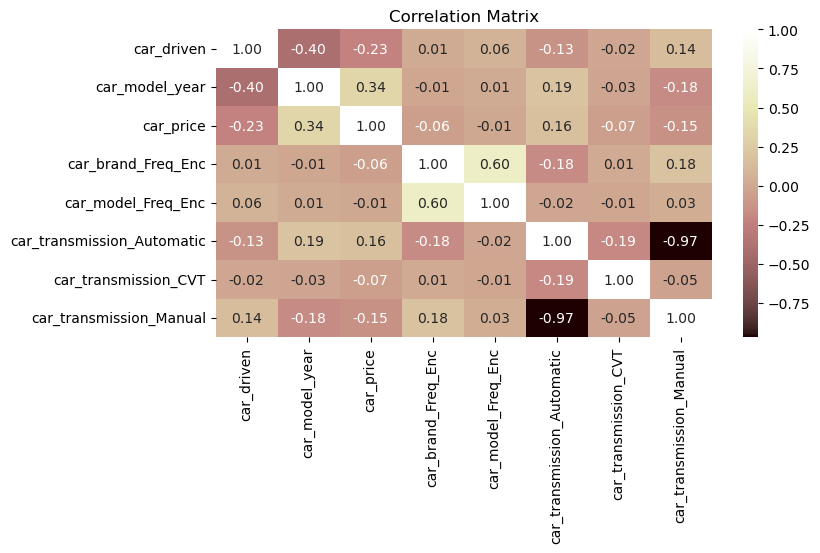

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Calculate correlation
correlation_matrix = df3.corr()

# Plot heatmap with pink color palette
plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='pink', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [8]:
df3.corr()["car_price"].sort_values(ascending=False)

car_price                     1.000000
car_model_year                0.337777
car_transmission_Automatic    0.162524
car_model_Freq_Enc           -0.006521
car_brand_Freq_Enc           -0.064322
car_transmission_CVT         -0.067476
car_transmission_Manual      -0.149001
car_driven                   -0.229652
Name: car_price, dtype: float64